<a href="https://colab.research.google.com/github/week4-group1/Swahili-NLP/blob/data_augmentation/notebook/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!cd '/content/drive/MyDrive/speech _to _text/African-language-Speech-Recognition---Speech-to-Text'


In [52]:
# import libraries
import numpy as np
import librosa
from PIL import Image
import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import IPython.display as ipd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import logging
import os
logging.basicConfig(filename='..\logs\model.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [71]:
def read_file_data_set(path_to_csv): #function to load our csv file
  try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv(path_to_csv)
    print(" ==== Successfuly read dataset ===== \n")
  except FileNotFoundError as e:    
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(error.__class__.__name__ + ": " + error.message)
  except OSError as err:
    logging.info(" !!!! OS error  !!!! ")
    print("OS error: {0}".format(err))
  return data

def get_wc(df, column, stop_words,mask): #function to plot a worldcloud
  try:
    logging.info("===================== plotting a wordcloud ==================== \n")
    print ("===================== plotting a wordcloud ================= \n ")
    plt.figure(figsize=(25, 15))
    wordcloud = WordCloud( max_words=5000,
                          background_color="salmon", width=3000, height=2000, colormap='Pastel1',
                          collocations=False, stopwords=stop_words, mask=mask).generate(' '.join(df[column].values))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Most Frequent Words In Swahili Audio Transcription', fontsize=16)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
  plt.show()

def add_root(x): #function to specify our root directory
  logging.info("===================== adding root directory ==================== \n")
  try:
    location_directory='/content/drive/MyDrive/speech _to _text/data/alldata'
    logging.info(" !!!! creating location column !!!! ")
    x=os.path.join(location_directory,x)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))

  return x


def play_audio(audio_path):   # function to play audio file
  try:
    logging.info(" ============ playing audio file ================= ")
    print(" ============ playing audio file ================= ")
    sig, sr = librosa.load(audio_path)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
  return(ipd.Audio(sig,rate = sr))

def plot_hist(df:pd.DataFrame, column:str, color:str)->None: #plotting histogram
  try:
    logging.info("===================== plotting histogram ==================== \n")
    print ("===================== plotting histogram ================= \n ")
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None: # plotting boxplot
  logging.info("===================== plotting box plot ==================== \n")
  print ("===================== plotting box plot ================= \n ")
  try:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
    plt.show()
    


def wav_plot(audio_path): #plotting wave plot of audio
  try:
    logging.info("====== Redaing the audio ====== ")
    sig, sr = librosa.load(audio_path)
    logging.info(" !!!! plotting audio wave plot !!!! ")
    print(" !!!! plotting audio wave plot !!!! ")
    plt.figure(figsize=(24, 4))
    librosa.display.waveplot(sig, sr=44100)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
  plt.show()

def plot_mfcc_feature(self, vis_mfcc_feature): #plotting MFCC
  logging.info("===================== plotting MFCC ==================== \n")
  print ("===================== plotting MFCC ================= \n ")
  try:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_mfcc_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized MFCC')
    plt.ylabel('Time')
    plt.xlabel('MFCC Coefficient')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    ax.set_xticks(np.arange(0, 13, 2), minor=False)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
  plt.show()

def plot_spectrogram_feature(self, vis_spectrogram_feature): # plotting spectrogram
  logging.info("===================== plotting spectrogram ==================== \n")
  print ("===================== plotting spectrogram ================= \n ")
  try:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
  except Exception as e:
    print (" !!!! Error !!!! ")
    print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
  plt.show()



In [54]:
path_to_audio = '/content/drive/MyDrive/speech _to _text/data/alldata'
path_to_csv = '/content/drive/MyDrive/speech _to _text/data/merged_audio_data.csv'


In [55]:
# loading the metadata cvs file
data = read_file_data_set(path_to_csv)
data.head()

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



,name_of_audio_file,text,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,3.14
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.10
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,3.65
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,3.90
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.94


In [56]:
data.describe()

,duration
count,10180.000000
mean,3.504846
std,1.024975
min,2.160000
25%,2.650000
50%,3.280000
75%,4.180000
max,6.150000


In [57]:
data.duration.value_counts()

2.17    68
2.55    67
2.34    63
2.73    62
2.27    61
        ..
6.05     4
5.80     4
6.12     4
5.65     2
6.15     1
Name: duration, Length: 400, dtype: int64

In [58]:
# counting common words in our transcriptions
try:
  logging.info("===================== reading words in text ==================== \n")
  print ("===================== reading words in text ================= \n ")
  words_in_data = pd.DataFrame(' '.join(data['text']).split())

  logging.info("===================== creating a column of words ==================== \n")
  print ("===================== creating a column of words ================= \n ")
  words_in_data.columns = ['word']

  logging.info("===================== grouping words by count ==================== \n")
  print ("===================== grouping words by count ================= \n ")
  words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
  words_data.columns = ['counts']
  logging.info("===================== reseting index ==================== \n")
  print ("=====================reseting index ================= \n ")
  words_data.reset_index(inplace=True)
  words_data = words_data.sort_values("counts", ascending=False)
except Exception as e:
  print (" !!!! Error !!!! ")
  print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))

  
words_data.tail()

===================== reading words in text ================= 
 
===================== creating a column of words ================= 
 
===================== grouping words by count ================= 
 
=====================reseting index ================= 
 


,word,counts
5392,kusambazwa,1
5393,kusanyika,1
5395,kusemaje,1
5396,kuseti,1
13196,zuri,1


In [59]:
try:
  words_data.loc[words_data['counts'] < 500, 'word'] = 'Other words'
  logging.info("====== ploting Distribution of words pie chart====== ")
  fig = px.pie(words_data, values='counts', names='word', title='Distribution of words', width=800, height=500)
except Exception as e:
  print (" !!!! Error !!!! ")
  print (" !!!! The system raised an exception {} !!!!!".format(e.__class__))
fig.show()


===================== plotting a wordcloud ================= 
 


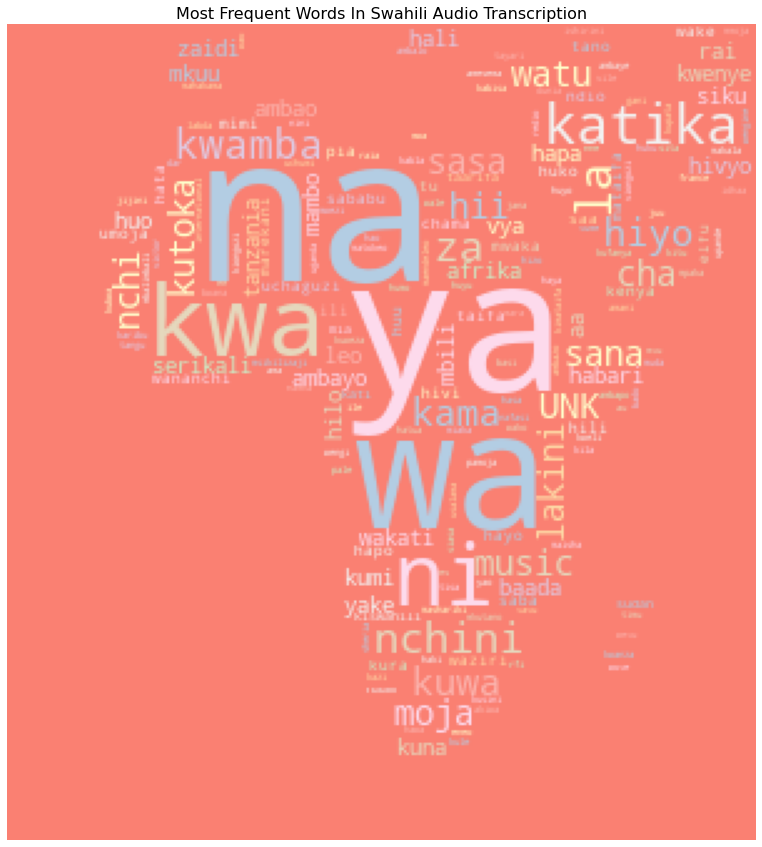

In [60]:
mask = np.array(PIL.Image.open("/content/drive/MyDrive/speech _to _text/African-language-Speech-Recognition---Speech-to-Text/Eastern-Africa-map.png"))
get_wc(data, 'text',[],mask) #plotting a wordcloud

In [72]:
# creating new columns for deeper exploration 
data["char_length"] = [len(i) for i in data.text] #column of the lenght of our transcripts
data["speed"] = round(data.char_length / data.duration,2) # column of the speed of our audios
data['Location']=data['name_of_audio_file'].apply(lambda x:add_root(x) )
data.head()

,name_of_audio_file,text,duration,char_length,speed,Location
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,3.14,38,12.10,/content/drive/MyDrive/speech _to _text/data/a...
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.10,51,16.45,/content/drive/MyDrive/speech _to _text/data/a...
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,3.65,66,18.08,/content/drive/MyDrive/speech _to _text/data/a...
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,3.90,59,15.13,/content/drive/MyDrive/speech _to _text/data/a...
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.94,47,15.99,/content/drive/MyDrive/speech _to _text/data/a...


In [62]:
data.describe()

,duration,char_length,speed
count,10180.000000,10180.00000,10180.000000
mean,3.504846,56.62387,16.137413
std,1.024975,22.63301,4.099449
min,2.160000,5.00000,0.970000
25%,2.650000,41.00000,14.290000
50%,3.280000,54.00000,16.670000
75%,4.180000,70.00000,18.770000
max,6.150000,146.00000,30.910000


#### ploting destributions and finding if there is outliers 

char_lenght destribution and its outliers

In [63]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
fig.show()

audios speed destribution and outliers

In [64]:
data["speed"] = data.char_length / data.duration
fig = px.histogram(data, x="speed", marginal="box", nbins=500)
fig.show()

audio duration distribution and outliers

===================== plotting histogram ================= 
 
===================== plotting box plot ================= 
 


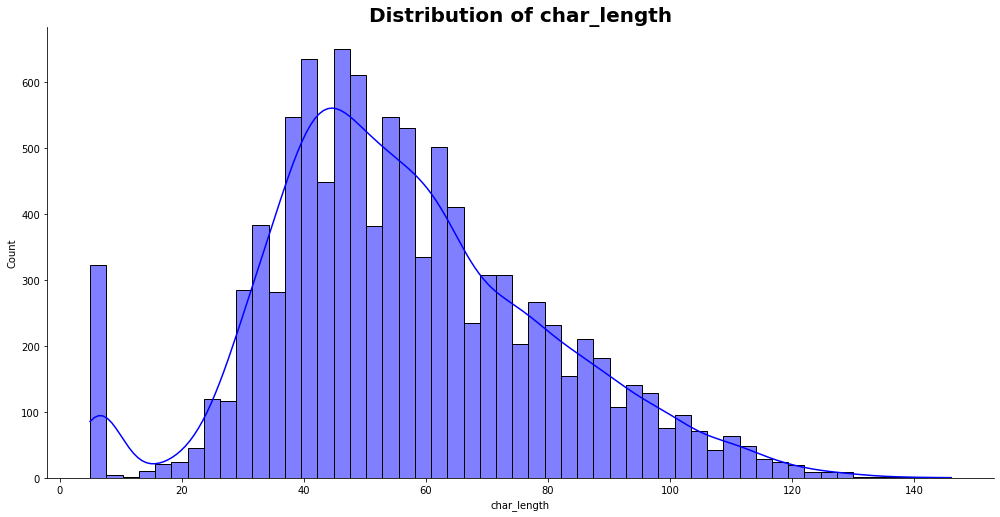

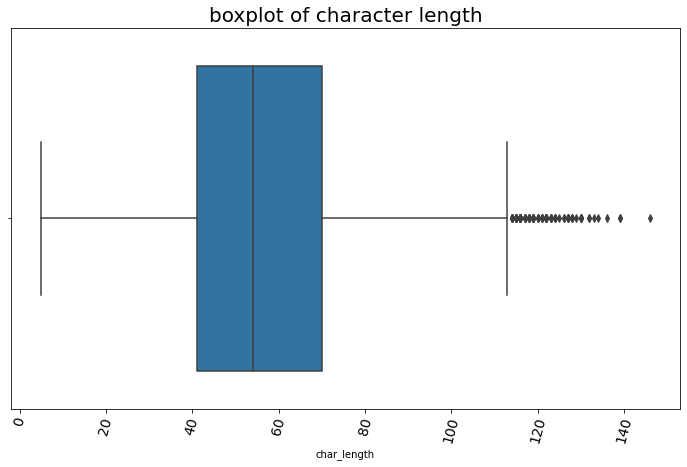

In [65]:
plot_hist(data,'char_length', 'blue')
plot_box(data,'char_length', 'boxplot of character length')

===================== plotting histogram ================= 
 
===================== plotting box plot ================= 
 


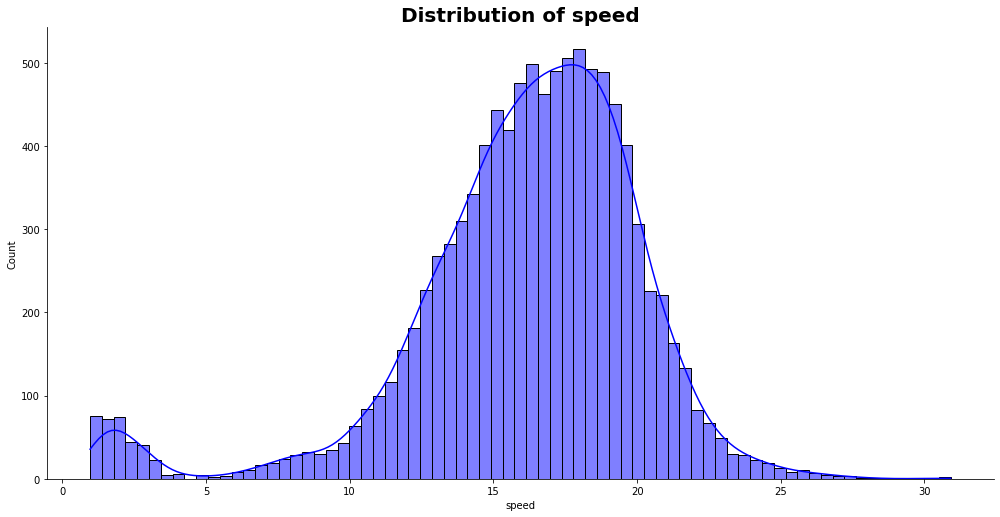

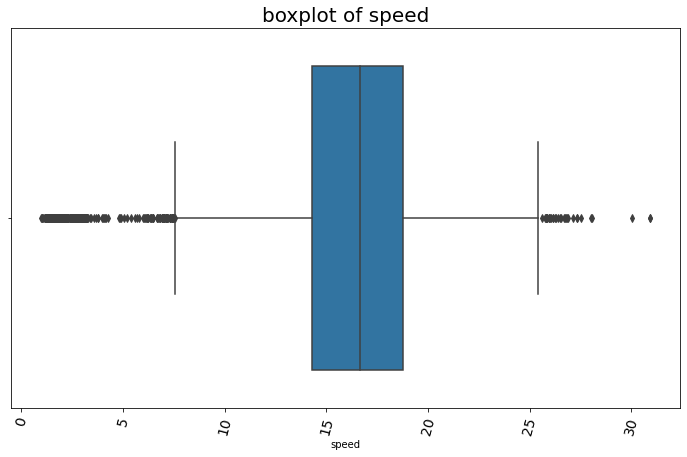

In [66]:
plot_hist(data,'speed', 'blue')
plot_box(data,'speed', 'boxplot of speed')

In [67]:
fig = px.histogram(data, x="duration", marginal="box", nbins=500)
fig.show()

===================== plotting histogram ================= 
 
===================== plotting box plot ================= 
 


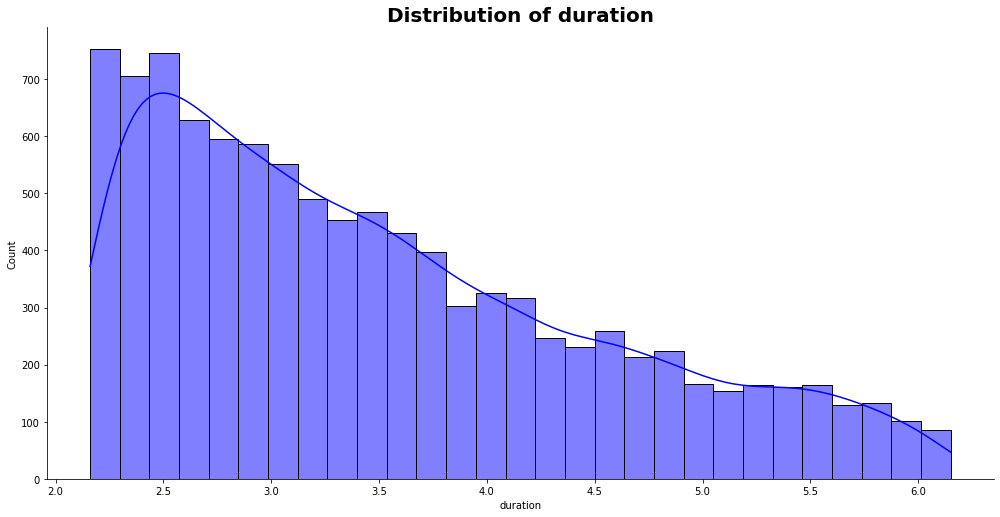

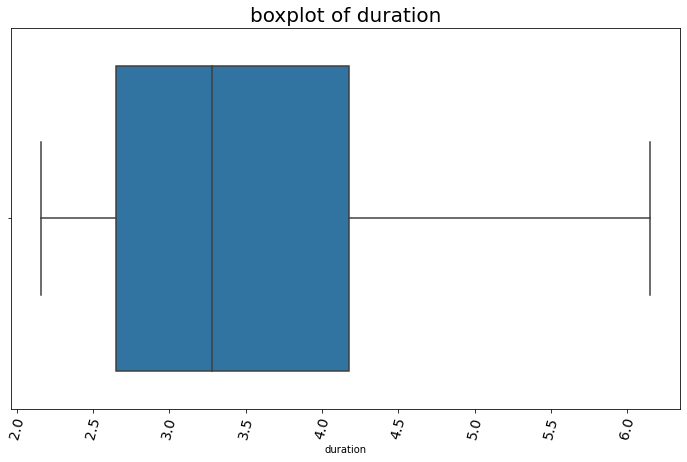

In [68]:
plot_hist(data,'duration', 'blue')
plot_box(data,'duration', 'boxplot of duration')

 !!!! plotting audio wave plot !!!! 


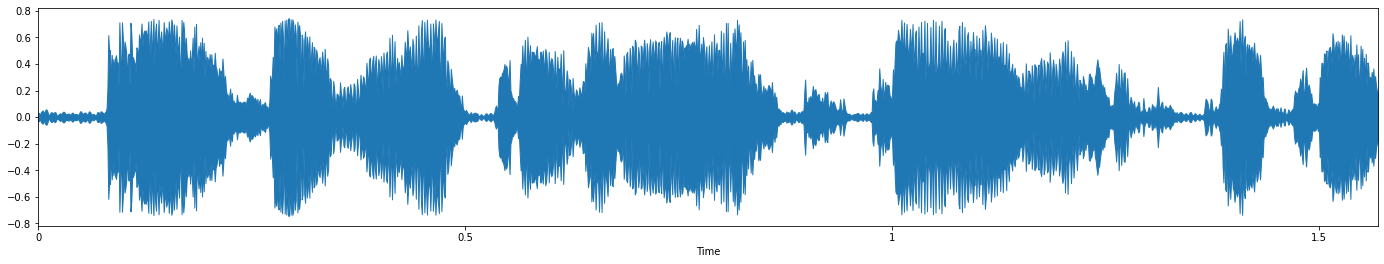

In [69]:
wav_plot(data.Location[0])

In [70]:
play_audio(data.Location[0])

 ============ playing audio file ================= 
